<a href="https://colab.research.google.com/github/anwitarajendra/performance-analysis-tcp-udp/blob/main/tcp_udp_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
raw_results = """
TCP 1024 10000 0.0770 seconds
UDP 1024 10000 0.1335 seconds
TCP 512 10000 0.0720 seconds
UDP 512 10000 0.1331 seconds
TCP 2048 10000 0.4974 seconds
UDP 2048 10000 0.2669 seconds
TCP 2048 5000 0.0703 seconds
UDP 2048 5000 0.1485 seconds
TCP 1024 5000 0.0328 seconds
UDP 1024 5000 0.0764 seconds
TCP 512 5000 0.0226 seconds
UDP 512 5000 0.0784 seconds
"""


In [4]:
import matplotlib.pyplot as plt


lines = raw_results.strip().split("\n")
data = []
for line in lines:
    parts = line.split()
    protocol = parts[0]
    buffer_size = int(parts[1])
    num_packets = int(parts[2])
    time_taken = float(parts[3])
    data.append((protocol, buffer_size, num_packets, time_taken))


labels = []
tcp_times = []
udp_times = []

for size in [512, 1024, 2048]:
    for count in [5000, 10000]:
        labels.append(f"{size}/{count}")
        tcp_time = next(t for p, b, n, t in data if p == "TCP" and b == size and n == count)
        udp_time = next(t for p, b, n, t in data if p == "UDP" and b == size and n == count)
        tcp_times.append(tcp_time)
        udp_times.append(udp_time)


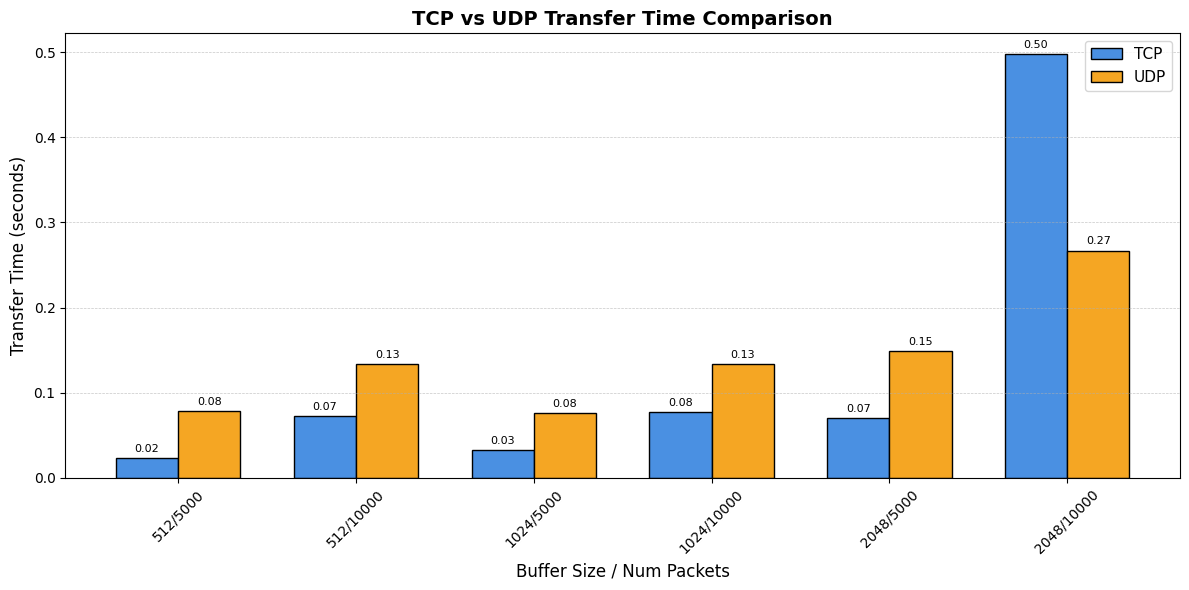

In [6]:
import numpy as np


x = np.arange(len(labels))
width = 0.35


fig, ax = plt.subplots(figsize=(12, 6), dpi=100)


bars1 = ax.bar(x - width/2, tcp_times, width, label='TCP', color='#4A90E2', edgecolor='black')
bars2 = ax.bar(x + width/2, udp_times, width, label='UDP', color='#F5A623', edgecolor='black')


ax.set_xlabel('Buffer Size / Num Packets', fontsize=12)
ax.set_ylabel('Transfer Time (seconds)', fontsize=12)
ax.set_title('TCP vs UDP Transfer Time Comparison', fontsize=14, fontweight='bold')


ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, fontsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)


for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8, color='black')


ax.legend(fontsize=11)
plt.tight_layout()
plt.show()


In [7]:
fig.savefig("tcp_udp_comparison.png", dpi=300)


In [8]:
plt.tight_layout()
plt.show()
fig.savefig("tcp_udp_comparison.png", dpi=300)


<Figure size 640x480 with 0 Axes>